<a href="https://colab.research.google.com/github/oktsadwikar/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preparation**

In [2]:
import pandas as pd
import numpy as np

### Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


- ✔️ (1) Set header = None and Set Columns names

In [3]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column name in the data frame
credit.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Missing Value


in this case, we want to drop all the missing value

In [5]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [6]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

## Data Preprocessing

In [7]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


## Try simple ML

In [8]:
import numpy as np

In [9]:
np.random.seed(seed=1)

In [10]:
a = np.random.randint(2,size=len(credit))

In [11]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [12]:
train = credit[a == 1]
train.shape

(324, 9)

In [13]:
test = credit[a == 0]
test.shape

(366, 9)

### Start decision tree

#### Import

In [14]:
from sklearn.tree import DecisionTreeClassifier

#### Define

In [15]:
Dtree1 = DecisionTreeClassifier(random_state=0)

#### Train

In [16]:
X_train = train.iloc[:,:-1] # all data without last column

In [17]:
Y_train = train.iloc[:,-1]

In [18]:
Dtree1.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
from sklearn import tree

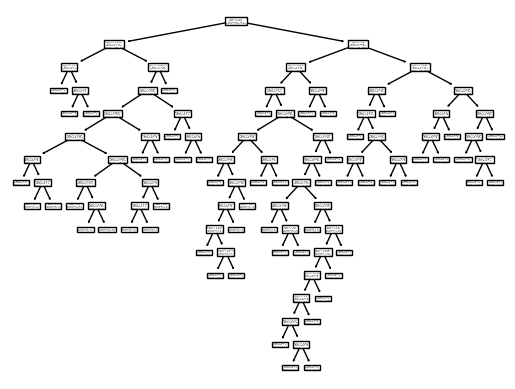

In [20]:
tree.plot_tree(Dtree1);

#### Test

In [21]:
X_test = test.iloc[:,:-1] # all data without last column

In [22]:
Y_test = test.iloc[:,-1]

In [23]:
y_predict = Dtree1.predict(X_test)

In [24]:
y_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(Y_test, y_predict)

0.825136612021858

### Set Parameter

to simplify the tree

#### Import

In [27]:
from sklearn.tree import DecisionTreeClassifier

#### Define

change the max_depth to set the max of step

In [28]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth = 4)

#### Train

In [29]:
Dtree2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [30]:
from sklearn import tree

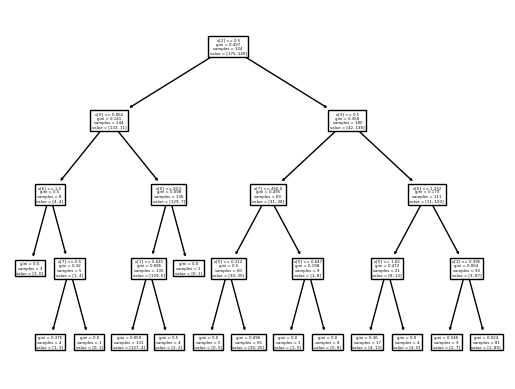

In [31]:
tree.plot_tree(Dtree2);

#### Test

In [32]:
y_predict2 = Dtree2.predict(X_test)

In [33]:
accuracy_score(Y_test, y_predict2)

0.8579234972677595

# **HOMEWORK 5**

Build decision tree model which has better accuracy than 0.86 and describe about parameters you set


Note : Get new tree with higher accuracy by trying other parameter, what you change like max_depth or max_leaf_node, or etc.

Deadline : Next Tuesday

### Define

In [48]:
Dtree3 = DecisionTreeClassifier(max_depth = 5, random_state = 0)

### Train

In [49]:
Dtree3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [50]:
from sklearn import tree

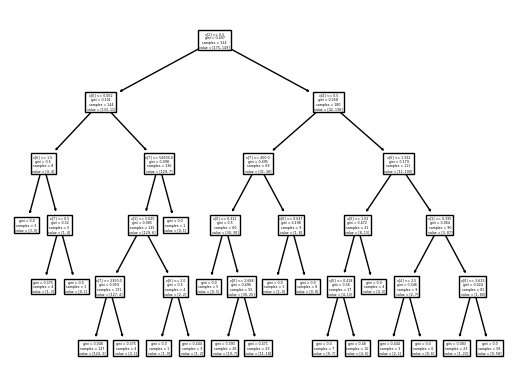

In [51]:
tree.plot_tree(Dtree3);

### Test

In [52]:
y_predict3 = Dtree3.predict(X_test)

In [53]:
accuracy_score(Y_test,y_predict3)

0.8688524590163934

## ANSWER

Set the max_depth = 5, then the accuaracy will increase. Now the accuracy is 0.8688 = 0.87.

When we set max_dept = 6, the accuracy will decrease (accuracy = 0.844).

Then, we use max_depth = 5 and try to set other parameter.

**set min_samples_split**

min_samples_split is the minimum number of samples required to split an internal node. try the min_samples_split with "trial and error" method, and get the min_sample_split is 50 to get better accuracy, which is 0.8825136612021858

### Define

In [174]:
Dtree4 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, random_state = 0)

### Train

In [175]:
Dtree4.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=0)

In [176]:
from sklearn import tree

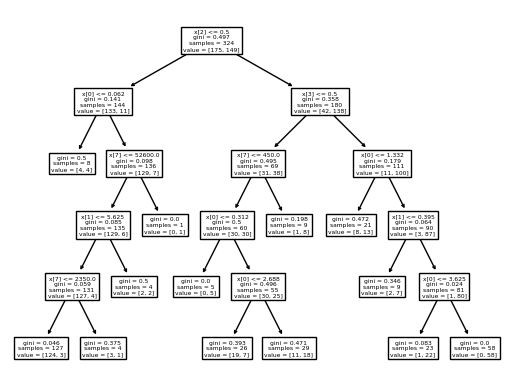

In [177]:
tree.plot_tree(Dtree4);

### Test

In [178]:
y_predict4 = Dtree4.predict(X_test)

In [179]:
accuracy_score(Y_test,y_predict4)

0.8825136612021858